<a href="https://colab.research.google.com/github/AnastasiiaDm/machine-learning/blob/main/DZ_6_metric_model_classification/metric_model_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [92]:
from google.colab import drive
drive.mount('/content/drive')

columns = ['Sex', 'Length', 'Diameter', 'Height', 'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Rings']

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/abalone.data', names=columns)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [27]:
df.isnull().sum()

,0
Sex,0
Length,0
Diameter,0
Height,0
WholeWeight,0
ShuckedWeight,0
VisceraWeight,0
ShellWeight,0
Rings,0


In [39]:
average_age = df['Rings'].mean()
print(f"The average age of abalone is: {average_age:.2f} years")

The average age of abalone is: 9.93 years


In [93]:
df['Sex'] = df['Sex'].map({'M': 0, 'F': 1, 'I': 2})

X = df.drop(columns=['Rings'])
y = df['Rings']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [94]:
# find optimal K value

k_values = range(1, 20, 2)
cv_scores = [cross_val_score(KNeighborsClassifier(n_neighbors=k), X, y, cv=5).mean() for k in k_values]

best_k = k_values[np.argmax(cv_scores)]
print(f"Optimal K from cross-validation: {best_k}")

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklea

Optimal K from cross-validation: 17


In [95]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

KNN Accuracy: 0.2703
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.37      0.77      0.50        13
           5       0.31      0.16      0.21        32
           6       0.28      0.31      0.29        48
           7       0.30      0.29      0.29        84
           8       0.28      0.39      0.33        99
           9       0.30      0.41      0.34       142
          10       0.28      0.32      0.30       139
          11       0.24      0.28      0.26        93
          12       0.07      0.04      0.05        51
          13       0.07      0.03      0.04        31
          14       0.00      0.00      0.00        26
          15       0.50      0.05      0.09        21
          16       0.17      0.08      0.11        13
          17       0.00      0.00      0.00         8
          18       0.00      0.00      0.00        12
          19       0.00      0.00    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


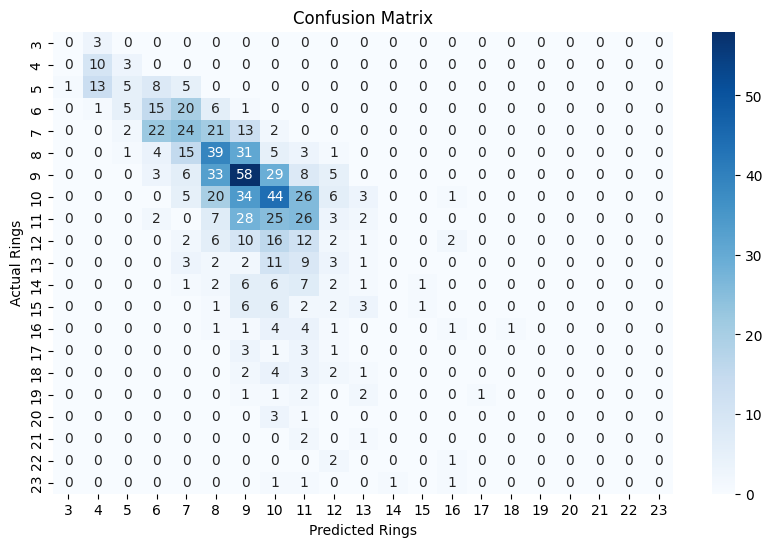

In [99]:
plt.figure(figsize=(10, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=sorted(y_test.unique()), yticklabels=sorted(y_test.unique()))
plt.xlabel("Predicted Rings")
plt.ylabel("Actual Rings")
plt.title("Confusion Matrix")
plt.show()


The model correctly predicts the number of rings 27% of the time, which is low for a classification task.

Key Observations:
- Poor performance for rare classes (e.g., Rings = 3, 17, 18, etc.)—the model struggles with underrepresented classes.
- Moderate performance for common classes (e.g., Rings = 7 to 11) with precision & recall around 30%–40%.
- Extreme misclassification in higher values (e.g., Rings > 14 have almost zero recall).




